In [1]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

Using TensorFlow backend.


In [2]:
batch_size = 32
epochs = 100

In [46]:
def load_example(path):
    return np.array(Image.open(path))
    

with open('../dataset/info.txt', 'rt') as f:
    images = f.read().split('\n')[:-1]

x_train = []
y_train = []

def rescale(image):
    shape = image.shape
    if shape == (320,200,4):
        return image
    image = image.tolist()
    if len(image[0]) == 199:
        for el in image:
            el.append([253,253,253,253])
    image.append(image[-1])
    return np.array(image)
        
    

for image in images:    
    x_train.append(rescale(load_example('../dataset/raw/' + image)))
    y_train.append(rescale(load_example('../dataset/marked/' + image)))

x_train = np.array(x_train).astype('float32')
y_train = np.array(y_train).astype('float32')

x_train /= np.max(x_train)
y_train /= np.max(y_train)

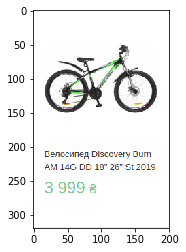

In [47]:
plt.imshow(x_train[0])

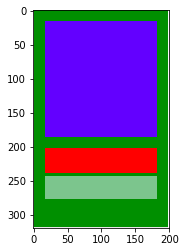

In [48]:
plt.imshow(y_train[0])

In [49]:
shape = x_train.shape[1:]
print(shape)

(320, 200, 4)


In [105]:
input_image = Input(shape=(320, 200, 4))

conv_1 = Conv2D(126, (3, 3), padding='same', activation='relu')(input_image)
batch_1 = BatchNormalization()(conv_1)
conv_2 = Conv2D(126, (3, 3), padding='same', activation='relu')(batch_1)
batch_2 = BatchNormalization()(conv_2)

max_pooling_2 = MaxPooling2D(pool_size=(4, 4))(batch_2)

conv_1_2 = Conv2D(64, (3, 3), padding='same', activation='relu')(max_pooling_2)
batch_1_2 = BatchNormalization()(conv_1_2)
conv_2_2 = Conv2D(64, (3, 3), padding='same', activation='relu')(batch_1_2)
batch_2_2 = BatchNormalization()(conv_2_2)

up_sampling_3 = UpSampling2D((4, 4))(batch_2_2)

conv_3_1 = Conv2D(16, (3, 3), padding='same', activation='relu')(up_sampling_3)
conv_3_2 = Conv2D(16, (3, 3), padding='same', activation='relu')(conv_3_1)

out = Conv2D(4, (3, 3), padding='same', activation='softmax')(conv_3_2)

model = Model(input_image, out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 320, 200, 4)       0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 320, 200, 126)     4662      
_________________________________________________________________
batch_normalization_87 (Batc (None, 320, 200, 126)     504       
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 320, 200, 126)     143010    
_________________________________________________________________
batch_normalization_88 (Batc (None, 320, 200, 126)     504       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 80, 50, 126)       0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 80, 50, 64)        72640     
__________

In [106]:
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6) #keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
#opt = keras.optimizers.Adam(lr=0.0002, decay=1e-6)
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# Let's train the model using RMSprop № categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [108]:
model.fit(x_train, y_train,
          batch_size=10,
          epochs=20,
          shuffle=True)

Epoch 1/20
24/24 [==============================] - 30s 1s/step - loss: 2.8962 - acc: 0.4006
Epoch 2/20
24/24 [==============================] - 32s 1s/step - loss: 2.7034 - acc: 0.4566
Epoch 3/20
24/24 [==============================] - 31s 1s/step - loss: 2.6251 - acc: 0.4903
Epoch 4/20
24/24 [==============================] - 31s 1s/step - loss: 2.5776 - acc: 0.4957
Epoch 5/20
24/24 [==============================] - 31s 1s/step - loss: 2.5371 - acc: 0.5112
Epoch 6/20
24/24 [==============================] - 32s 1s/step - loss: 2.5009 - acc: 0.5241
Epoch 7/20
24/24 [==============================] - 32s 1s/step - loss: 2.4740 - acc: 0.5232
Epoch 8/20
24/24 [==============================] - 31s 1s/step - loss: 2.4499 - acc: 0.5447
Epoch 9/20
24/24 [==============================] - 32s 1s/step - loss: 2.4332 - acc: 0.5447
Epoch 10/20
24/24 [==============================] - 32s 1s/step - loss: 2.4249 - acc: 0.5457
Epoch 11/20
24/24 [==============================] - 32s 1s/step - lo

In [109]:
d = model.predict(np.expand_dims(x_train[8], axis=0))

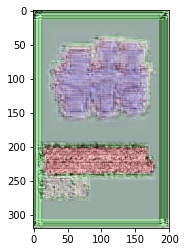

In [110]:
plt.imshow(d[0])

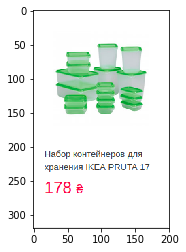

In [111]:
plt.imshow(x_train[8])